# General data analysis

## Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data from file

In [43]:
df = pd.read_csv('data/bmd_prep.csv')
df.head()

,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


## 1. Basic statistics - numeric variables

count, mean, std, min, max, median

In [8]:
numeric_vars = df.select_dtypes(include=np.number).columns.tolist()
np.round(df[numeric_vars].describe(),3)

['age', 'weight_kg', 'height_cm', 'waiting_time', 'bmd']


,age,weight_kg,height_cm,waiting_time,bmd
count,169.000,169.000,169.000,169.000,169.000
mean,63.632,64.666,160.254,19.740,0.783
std,12.357,11.537,7.928,15.801,0.167
min,35.814,36.000,142.000,5.000,0.408
25%,54.424,56.000,154.000,9.000,0.671
50%,63.488,64.500,160.500,14.000,0.786
75%,72.081,73.000,166.000,24.000,0.889
max,88.754,96.000,177.000,96.000,1.362


variance

In [27]:
np.round(df[numeric_vars].var(), 3)

age             152.694
weight_kg       133.106
height_cm        62.857
waiting_time    249.658
bmd               0.028
dtype: float64

mode

In [38]:
np.round(df[numeric_vars].mode(), 3)

,age,weight_kg,height_cm,waiting_time,bmd
0,35.814,55.0,154.0,6.0,0.690
1,36.648,59.0,NaN,7.0,0.713
2,37.462,62.0,NaN,NaN,0.889
3,39.255,NaN,NaN,NaN,NaN
4,40.232,NaN,NaN,NaN,NaN
...,...,...,...,...,...
164,85.902,NaN,NaN,NaN,NaN
165,86.860,NaN,NaN,NaN,NaN
166,87.935,NaN,NaN,NaN,NaN
167,88.024,NaN,NaN,NaN,NaN


## 2. Basic statistics - categorical variables

### Frequency tables

In [29]:
categorical_vars = df.select_dtypes(exclude=np.number).columns.tolist()
df[categorical_vars].value_counts()

sex  fracture     medication     
M    no fracture  No medication      49
F    no fracture  No medication      46
M    fracture     No medication      21
F    fracture     No medication      20
M    no fracture  Glucocorticoids    11
F    no fracture  Glucocorticoids     8
                  Anticonvulsant      4
     fracture     Glucocorticoids     3
                  Anticonvulsant      2
M    fracture     Anticonvulsant      2
                  Glucocorticoids     2
     no fracture  Anticonvulsant      1
dtype: int64

In [33]:
for var in categorical_vars:
    ft = df[[var]].value_counts()
    display(ft)

sex
M      86
F      83
dtype: int64

fracture   
no fracture    119
fracture        50
dtype: int64

medication     
No medication      136
Glucocorticoids     24
Anticonvulsant       9
dtype: int64

## 3. Pivot tables

### Hypothesis 1

In [49]:
# group values in numeric features to equal ranges
df = pd.read_csv('data/bmd_prep.csv')
df['age'] = pd.cut(df['age'], 6, precision=0)
df['weight_kg'] = pd.cut(df['weight_kg'], 3, precision=0)

pivot = np.round(pd.pivot_table(df, values='bmd', 
                                index=['sex','weight_kg', ], 
                                columns=['age'],
                                aggfunc=['mean'],
                                margins=True,
                                margins_name='Checksum',
                                fill_value='-'),2)
pivot

mean                                         \
age                   (36.0, 45.0] (45.0, 53.0] (53.0, 62.0] (62.0, 71.0]   
sex      weight_kg                                                          
F        (36.0, 56.0]       0.8888      0.71702     0.671383     0.700929   
         (56.0, 76.0]            -     0.825856     0.828788     0.798714   
         (76.0, 96.0]            -            -      0.85175     0.720533   
M        (36.0, 56.0]        0.762            -     0.756567      0.64615   
         (56.0, 76.0]     1.027325     0.822356     0.860767     0.807264   
         (76.0, 96.0]      0.88595      0.89415      0.92668       0.9745   
Checksum                  0.892545     0.808292     0.823289     0.800995   

                                                           
age                   (71.0, 80.0] (80.0, 89.0]  Checksum  
sex      weight_kg                                         
F        (36.0, 56.0]     0.584114     0.551625    0.6568  
         (56.0, 76.0]       0.5757       0.8171  0.790464  
         (76.0, 96.0]       0.6518       0.9061   0.75935  
M        (36.0, 56.0]       0.5287      0.61185  0.675612  
         (56.0, 76.0]     0.839067       0.7478  0.838392  
         (76.0, 96.0]       1.0015      0.70525  0.917216  
Checksum                  0.694108     0.674905  0.783104

Z otrzymanej tabeli wynika, że 
* wraz z wiekiem kości są coraz słabsze (coraz niższy wskaźnik `bmd`). 
* W przypadku mężczyzn, nie uwzględniając zakresu wiekowego, obserwujemy wzrost wskaźnika `bmd` wraz z masą ciała (`weigth_kg`).
* W przypadku kobiet obserwujemy, że średnio więcej minerałów w kościach mają kobiety w wieku 56-76 niż 76-96.

### Hypothesis 2

In [64]:
# group values in numeric features to equal ranges
df = pd.read_csv('data/bmd_prep.csv')
df['age'] = pd.cut(df['age'], 6, precision=0)

# create pivot tables for unique values in 'fracture' column
fracture_distinct_values = df['fracture'].unique().tolist()
for value in fracture_distinct_values:
    pivot = df[df.fracture == value].pivot_table(values='fracture', 
                    index=['medication', ], 
                    columns=['age'],
                    aggfunc=['count'],
                    margins=True,
                    margins_name='Checksum',
                    fill_value='-')
    print(f'Pivot table for: "{value}"')
    display(pivot)

Pivot table for: "no fracture"


count                                         \
age             (36.0, 45.0] (45.0, 53.0] (53.0, 62.0] (62.0, 71.0]   
medication                                                            
Anticonvulsant             0            0            4            1   
Glucocorticoids            1            3            6            5   
No medication              8           17           27           28   
Checksum                   9           20           37           34   

                                                    
age             (71.0, 80.0] (80.0, 89.0] Checksum  
medication                                          
Anticonvulsant             0            0        5  
Glucocorticoids            3            1       19  
No medication             11            4       95  
Checksum                  14            5      119

Pivot table for: "fracture"


count                                         \
age             (36.0, 45.0] (45.0, 53.0] (53.0, 62.0] (62.0, 71.0]   
medication                                                            
Anticonvulsant             0            1            0            0   
Glucocorticoids            0            0            1            0   
No medication              2            4            6           10   
Checksum                   2            5            7           10   

                                                    
age             (71.0, 80.0] (80.0, 89.0] Checksum  
medication                                          
Anticonvulsant             0            3        4  
Glucocorticoids            2            2        5  
No medication              9           10       41  
Checksum                  11           15       50

Na podstawie otrzymanych tabel dla zmiennej `fracture` możemy zaobserwować, że najwięcej przypadków osób ze złamaniem w badanej próbie to osoby w przedziale wiekowymi od 60 do 90 lat (osoby starsze). Zdecydowana większość osób w tej próbie nie miała leczenia. Większośc osób, które nie doznały złamania to osoby w wieku od 45 do 70 lat. Niewielka częśc osób miała podany lek przeciwdrgawkowy (anticonvulsant) lub glukokortykoid, przy czym tylko kilka osób, które miały podane te leki, doznały złamania (4+5 = 9).

## 4. Histograms

#### Load the data again to undo changes made to numeric columns in `Pivot tables` section

In [34]:
df = pd.read_csv('data/bmd_prep.csv')

### Hypothesis 1 - Histogram for `bmd` categorized by `sex`

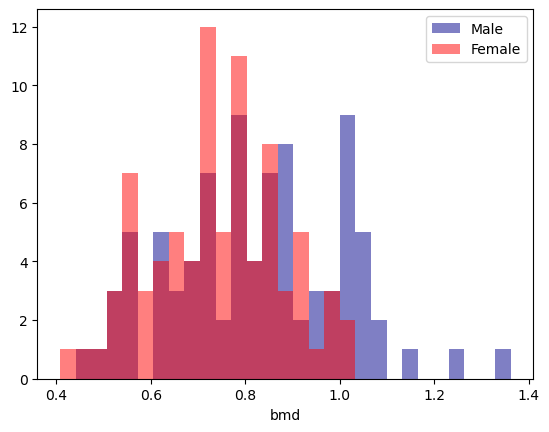

In [80]:
var = 'bmd'
grouping_var = 'sex'

min = df[var].min()
max = df[var].max()
bins = np.linspace(min, max, 30)

bmd_male = df.loc[df[grouping_var]=='M', var]
bmd_female = df.loc[df[grouping_var]=='F', var]

plt.hist(bmd_male, bins, alpha=0.5, label='Male', color='darkblue')
plt.hist(bmd_female, bins, alpha=0.5, label='Female', color='red')
plt.legend(loc='upper right')
plt.xlabel(var)
plt.show()

### Hypothesis 2 - Histogram for `fracture` variable categorized by `medication`

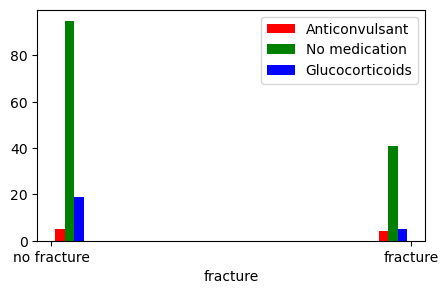

In [93]:
var = 'fracture'
grouping_var = 'medication'

medication_labels = df['medication'].unique().tolist()

anticonv = df.loc[df[grouping_var]==medication_labels[0], var]
gluco = df.loc[df[grouping_var]==medication_labels[1], var]
no_med = df.loc[df[grouping_var]==medication_labels[2], var]

plt.figure(figsize=(5,3))
plt.hist([anticonv, gluco, no_med], label=medication_labels, color=['red', 'green', 'blue'])
plt.legend(loc='upper right')
plt.xlabel(var)
plt.show()

## 5. Interaction plots

In [2]:
from statsmodels.graphics.factorplots import interaction_plot

### Hypothesis 1

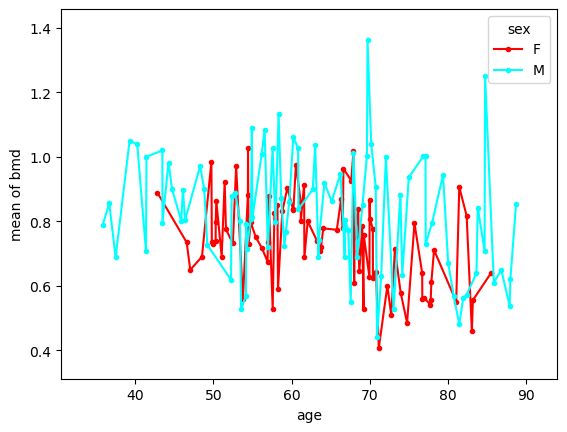

In [41]:
df = pd.read_csv('data/bmd_prep.csv')
fig = interaction_plot(x=df['age'], trace=df['sex'], response=df['bmd'])
plt.show()

### Hypothesis 2

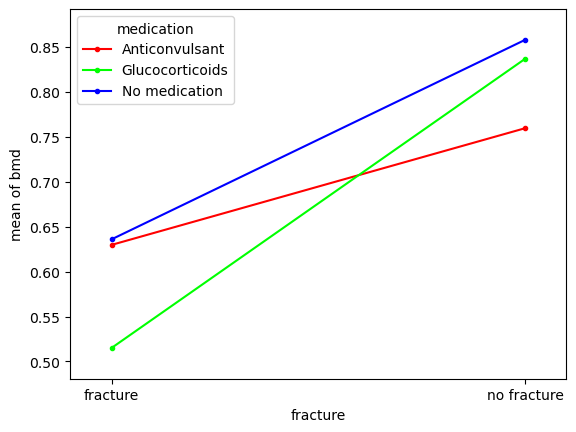

In [4]:
df = pd.read_csv('data/bmd_prep.csv')
fig = interaction_plot(x=df['fracture'], trace=df['medication'], response=df['bmd'])
plt.show()

## 6. Correlation matrix

In [6]:
df = pd.read_csv('data/bmd_prep.csv')
numeric_vars = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_vars].corr()

,age,weight_kg,height_cm,waiting_time,bmd
age,1.000000,-0.093117,-0.215269,0.037561,-0.306576
weight_kg,-0.093117,1.000000,0.367827,-0.046684,0.555964
height_cm,-0.215269,0.367827,1.000000,0.009275,0.324430
waiting_time,0.037561,-0.046684,0.009275,1.000000,-0.192069
bmd,-0.306576,0.555964,0.324430,-0.192069,1.000000


Najsilniejszą korelację obserwujemy dla zmiennych `bmd` oraz `weight_kg` (wsp. korelacji równy <b>0.56</b>).
Występuje również umiarkowany związek (liniowy) między parami zmiennych `weight_kg` oraz `heigth_cm` (wsp. kor. <b>0.37</b>), `height_cm` oraz `bmd` (wsp. kor. <b>0.32</b>) a także `bmd` oraz `age` (<b>-0.31</b>). Pozostałe zależności są słabsze.

## 7. Chi^2 Test

In [8]:
from scipy.stats import chi2_contingency

,variable,Chi^2,p_value
0,age,27885.000000,0.241274
1,sex,164.998739,0.485386
2,fracture,169.000000,0.399333
3,weight_kg,8520.316071,0.207943
4,height_cm,8419.016667,0.485603
5,medication,338.000000,0.368880
6,waiting_time,7606.408333,0.444926


,variable,Chi^2,p_value
0,age,169.000000,0.463822
1,sex,0.000000,1.000000
2,weight_kg,54.281698,0.350510
3,height_cm,40.926944,0.842458
4,medication,1.856893,0.395167
5,waiting_time,51.552251,0.265660
6,bmd,169.000000,0.399333


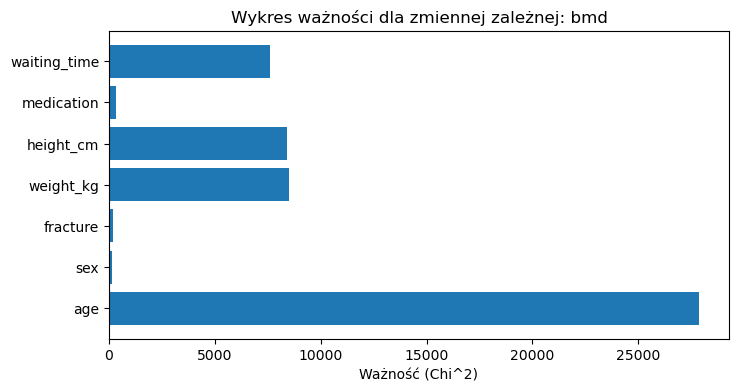

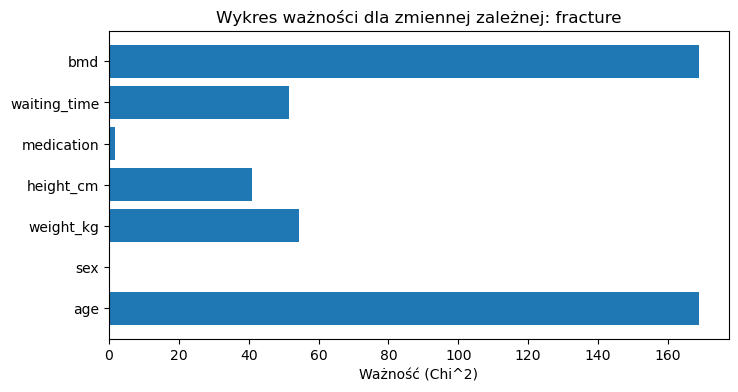

In [11]:

df = pd.read_csv('data/bmd_prep.csv')

# Dependent variables from all hypothesis
dependent_vars = ['bmd', 'fracture']

for var in dependent_vars:
    X = df
    y = X[var]
    X = X.drop(columns=[var])

    chi2_test_df = pd.DataFrame(columns=['variable', 'Chi^2', 'p_value'])
    chi2_test_results = []
    # perform chi2 test for each independent variable
    for column in X.columns:
        data_cont = pd.crosstab(X[column], y)
        chi2, p_value, _, _ = chi2_contingency(data_cont)
        chi2_test_results.append({'variable': column,'Chi^2': chi2, 'p_value': p_value})
    chi2_test_df = chi2_test_df.from_records(chi2_test_results)

    s = chi2_test_df.style.set_caption(f'Chi^2 Test Results. Variable: {var}')
    plt.figure(figsize=(8,4))
    plt.barh(chi2_test_df['variable'], chi2_test_df['Chi^2'])
    plt.xlabel('Ważność (Chi^2)')
    plt.title(f'Wykres ważności dla zmiennej zależnej: {var}')
    display(s)

Z przeprowadzonego testu Chi^2 wynika, iż najważniejszymi zmiennymi objaśniającymi dla zmiennej `bmd` są `age`, `weight_kg` i `height`. Natomiast wybrana jako predyktor zmienna `sex` okazuje się być nie tak ważna. W przypadku zmiennej `fracture` najważniejszymi predyktorami są `age` oraz `bmd`, które zostały wybrane przy definiowaniu hipotez. Natomiast zmienna `medication` okazała się bardzo mało ważna.

## 8. Boxplots

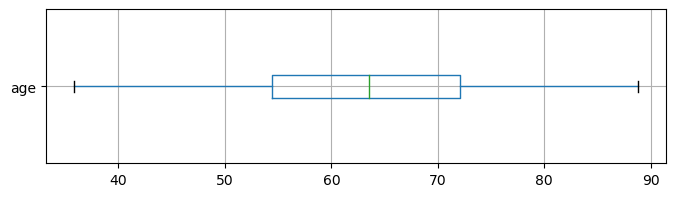

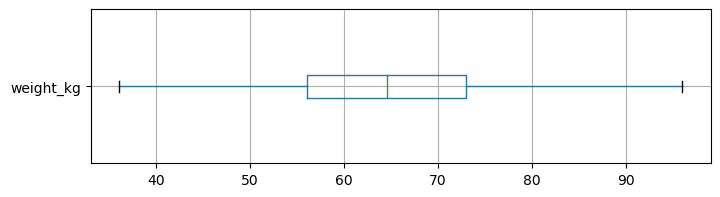

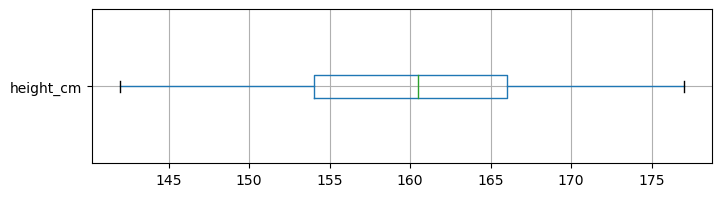

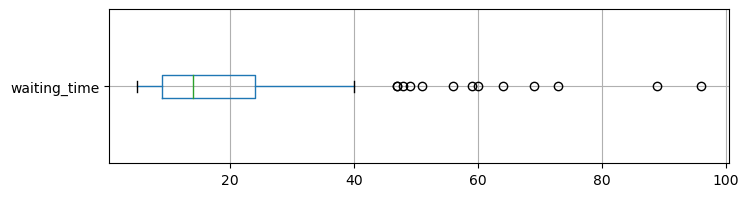

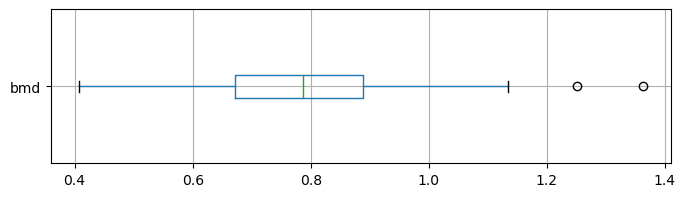

<Figure size 800x200 with 0 Axes>

In [43]:
df = pd.read_csv('data/bmd_prep.csv')
numeric_vars = df.select_dtypes(include=np.number).columns.tolist()

for var in numeric_vars:
    fig = df.boxplot(column=var, vert=False, figsize=(8,2))
    plt.figure(figsize=(8,2))

### Boxplots by group

<Axes: title={'center': 'bmd'}, xlabel='sex'>

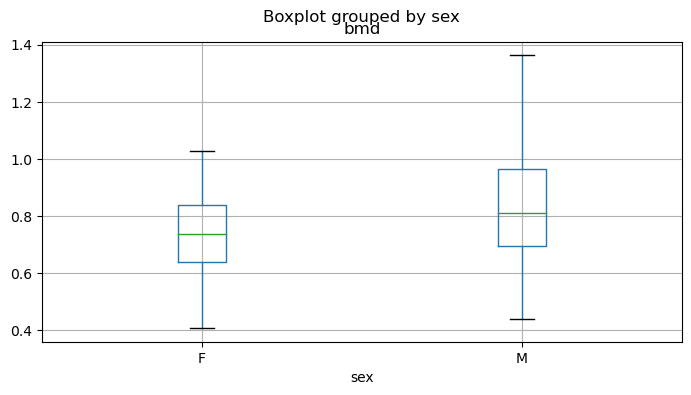

In [13]:
df.boxplot(column='bmd', by='sex', figsize=(8,4))

<Axes: title={'center': 'bmd'}, xlabel='fracture'>

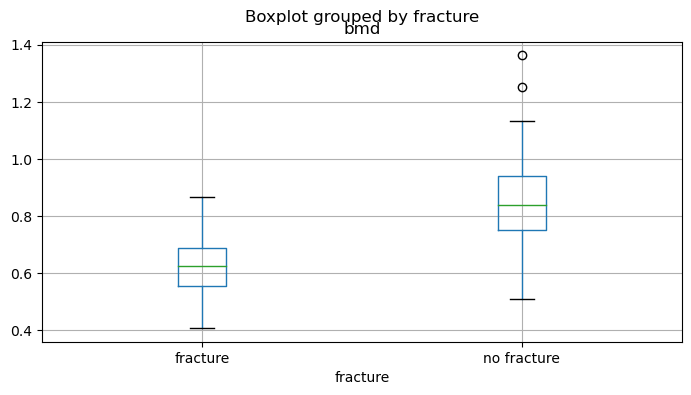

In [15]:
df.boxplot(column='bmd', by='fracture', figsize=(8,4))

## 10. Scatter plots

Regression equation: y = 0.26 + 0.01x


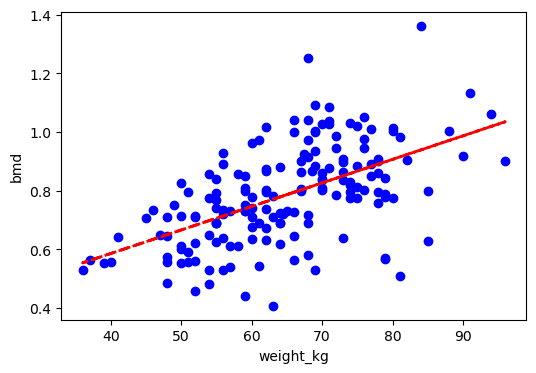

In [31]:
x=df['weight_kg']
y=df['bmd']

def custom_scatter(x, y):
    #find line of best fit
    a, b = np.polyfit(x, y, 1)
    #add points to plot
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, color='blue')
    #add line of best fit to plot
    plt.plot(x, a*x+b, color='red', linestyle='--', linewidth=2)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    print('Regression equation:', 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x')

custom_scatter(x, y)

Regression equation: y = -0.31 + 0.01x


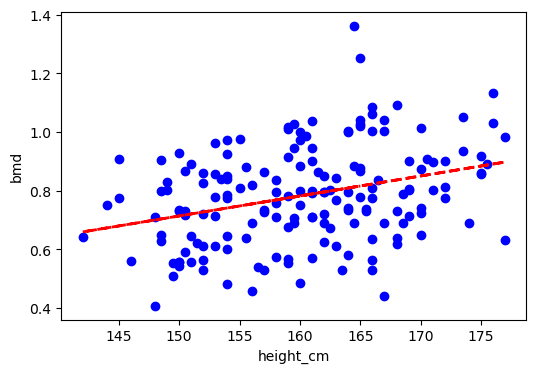

In [32]:
x=df['height_cm']
y=df['bmd']

custom_scatter(x, y)

Regression equation: y = 1.05 + -0.00x


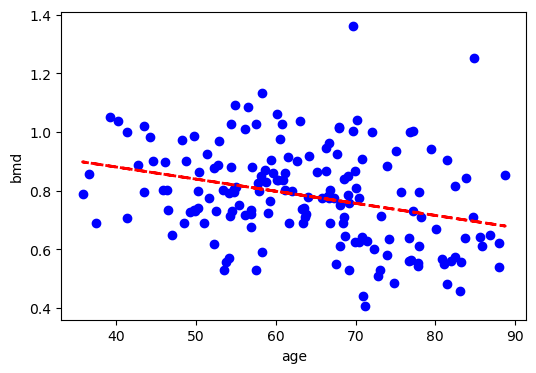

In [33]:
x=df['age']
y=df['bmd']

custom_scatter(x, y)

### Skategoryzowane wykresy rozrzutu względem zmiennej `fracture`

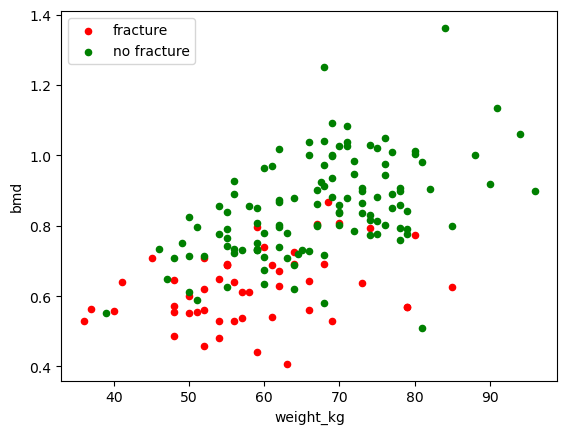

In [37]:
x='weight_kg'
y='bmd'

def fracture_scatter(x, y):
    fig, ax = plt.subplots()
    colors = {'fracture':'red', 'no fracture':'green'}

    grouped = df.groupby('fracture')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=x, y=y, label=key, color=colors[key], marker='o')

    plt.show()

fracture_scatter(x, y)

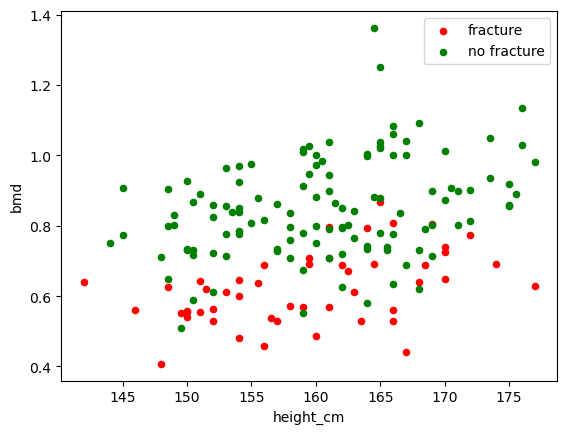

In [38]:
x='height_cm'
y='bmd'

fracture_scatter(x, y)

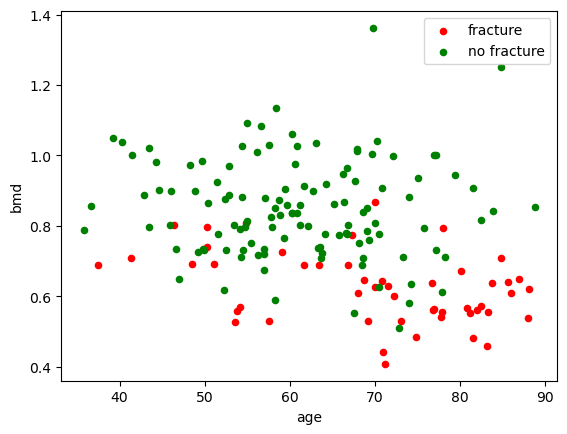

In [39]:
x='age'
y='bmd'

fracture_scatter(x, y)

Na otrzymanych wykresach możemy zauwazyć, że złamania najczęściej doznają osoby, których wskaźnik `bmd` jest mniejszy niż 0.7.

## 11. Opracowanie wyników i wnioski

1. Jakie zmienne są skorelowane ze zmiennymi zależnymi w ramach postawionych hipotez?
* W przypadku hipotezy 1, zmienne `age` oraz `weight_kg` są skorelowane ze zmienną zależną `bmd`. Współczynnik korelacji liniowej wynosi dla `age`: <b>-0.31</b> oraz dla `weight_kg`: <b>0.56</b>.
* W przypadku hipotezy 2 nie można określić korelacji między predyktorami a zmienną zależną, gdyż jest ona jakościowa.
2. Które zmienne mają najsilniejszy wpływ na zmienne zależne?
* Dla hip. 1 najsilniejszy wpływ ma zmienna `weight_kg`. Otrzymana na wykresie rozrzutu prosta regresji cechuje się największym nachyleniem prostej względem osi poziomej. Możemy zaobserwować pewną zależność liniową między tymi zmiennymi (`weight_kg` oraz `bmd`)
3. Czy zmienne objaśniające są wzajemnie skorelowane?
* W przyp. hipotezy 1 korelacja między predyktorami `age` oraz `weight_kg` jest słaba (wsp. kor. wynosi ok. 0.1)
* W przyp. hipotezy 2 występuje umiarkowana korelacja między predyktorami `age` oraz `bmd` (wsp. kor. = -0.31)
4. Jakiej postaci jest ta zależność?
* Silną korelację obserwujemy dla zmiennych `bmd` oraz `weight_kg` (wsp. korelacji równy <b>0.56</b>).
* Umiarkowanie silny związek (liniowy) obserwujemy dla par zmiennych `bmd` oraz `age` (<b>-0.31</b>).
* Słaba korelacja między `age` oraz `weight` (<b>0.1</b>).